In [1]:
## load the libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import  stats
import seaborn  as sns
import statistics 
import statsmodels.formula.api as smf

In [2]:
## Load Swiz  dataset
df = pd.read_csv('Data/Brazil_Analysis_Dataset.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,,Country,Year,nuclear_total_supply,renewables_waste_total_supply,nuclear_total_consumption,renewables_waste_total_consumption,coal_peat_oil_shale_total_consumption,crude_NGL_feedstocks_total_consumption,oil_products_total_consumption,coal_peat_oil_shale_total_supply,crude_NGL_feedstocks_total_supply,oil_products_total_supply,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
0,71,Brazil,1990,24.403635,2749.090549,24.403635,2749.090549,153.568789,0.0,2238.056368,404.905604,2567.576528,2529.576964,219750670,0.0007,1.47,149143223,0.0180,0.0061
1,72,Brazil,1991,15.730909,2762.731365,15.730909,2762.731365,181.887952,0.0,2269.237624,462.933994,2520.199290,2442.195580,225990470,0.0284,1.49,151724256,0.0173,0.0062
2,73,Brazil,1992,19.189092,2756.178357,19.189092,2756.178357,166.008868,0.0,2332.079667,448.061204,2588.844149,2529.574171,230088200,0.0181,1.49,154275079,0.0168,0.0063
3,74,Brazil,1993,4.821816,2793.328667,4.821816,2793.328667,174.594718,0.0,2417.853571,461.002942,2615.756083,2550.911184,240413480,0.0449,1.53,156794577,0.0163,0.0066
4,75,Brazil,1994,0.600002,2936.149957,0.600002,2936.149957,183.093177,0.0,2550.579807,473.410189,2681.141761,2709.220418,247389640,0.0290,1.55,159265006,0.0158,0.0068


In [5]:
df1 = df
df1['RE_Consumption_Volume'] = df1['nuclear_total_supply'] + df1['renewables_waste_total_supply']
df1['RE_Supply_Volume'] = df1['nuclear_total_consumption'] + df1['renewables_waste_total_consumption']
df1['NRE_Consumption_Volume'] = df1['coal_peat_oil_shale_total_consumption'] + df1['crude_NGL_feedstocks_total_consumption'] + df1['oil_products_total_consumption']
df1['NRE_Supply_Volume'] = df1['coal_peat_oil_shale_total_supply'] + df1['crude_NGL_feedstocks_total_supply'] + df1['oil_products_total_supply']
df2 = df1[['Country','Year','RE_Supply_Volume','RE_Consumption_Volume','NRE_Supply_Volume','NRE_Consumption_Volume','fossil_co2_emissions',
          'co2_emission_change','co2_emissions_per_capita','population','pop','share_of_world']]

In [7]:
df2

,Country,Year,RE_Supply_Volume,RE_Consumption_Volume,NRE_Supply_Volume,NRE_Consumption_Volume,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
0,Brazil,1990,2773.494184,2773.494184,5502.059096,2391.625157,219750670,0.0007,1.47,149143223,0.0180,0.0061
1,Brazil,1991,2778.462274,2778.462274,5425.328865,2451.125576,225990470,0.0284,1.49,151724256,0.0173,0.0062
2,Brazil,1992,2775.367449,2775.367449,5566.479524,2498.088535,230088200,0.0181,1.49,154275079,0.0168,0.0063
3,Brazil,1993,2798.150483,2798.150483,5627.670209,2592.448289,240413480,0.0449,1.53,156794577,0.0163,0.0066
4,Brazil,1994,2936.749959,2936.749959,5863.772368,2733.672984,247389640,0.0290,1.55,159265006,0.0158,0.0068
5,Brazil,1995,2941.775094,2941.775094,5851.020690,2928.821649,268124510,0.0838,1.66,161735073,0.0155,0.0074
6,Brazil,1996,2980.437491,2980.437491,6291.956974,3139.450431,288845880,0.0773,1.76,164202549,0.0153,0.0080
7,Brazil,1997,3092.449523,3092.449523,6684.513657,3373.839544,308449100,0.0679,1.85,166661659,0.0150,0.0085
8,Brazil,1998,3126.141176,3126.141176,7129.925932,3482.634739,318211250,0.0316,1.88,169159655,0.0150,0.0088
9,Brazil,1999,3201.685198,3201.685198,7345.471155,3515.417961,327433200,0.0290,1.91,171641543,0.0147,0.0090


In [7]:
## Check the correlation between data 


df_correlation = df2[['Year','NRE_Consumption_Volume','RE_Consumption_Volume','fossil_co2_emissions','population']]
df_correlation.head()

,Year,NRE_Consumption_Volume,RE_Consumption_Volume,fossil_co2_emissions,population
0,1990,2391.625157,2773.494184,219750670,149143223
1,1991,2451.125576,2778.462274,225990470,151724256
2,1992,2498.088535,2775.367449,230088200,154275079
3,1993,2592.448289,2798.150483,240413480,156794577
4,1994,2733.672984,2936.749959,247389640,159265006


In [9]:
df_correlation.corr().T

,Year,NRE_Consumption_Volume,RE_Consumption_Volume,fossil_co2_emissions,population
Year,1.000000,0.925320,0.981904,0.940815,0.993303
NRE_Consumption_Volume,0.925320,1.000000,0.892743,0.986760,0.939885
RE_Consumption_Volume,0.981904,0.892743,1.000000,0.914126,0.969520
fossil_co2_emissions,0.940815,0.986760,0.914126,1.000000,0.953229
population,0.993303,0.939885,0.969520,0.953229,1.000000


Correlation Matrix Interpretation
Year:
Strong positive correlation with population (0.987): As the year progresses, the population tends to increase.
Strong negative correlation with NRE_Consumption_Volume (-0.824): Suggests that as time progresses, reliance on non-renewable energy consumption decreases.
Moderate positive correlation with RE_Consumption_Volume (0.674): Indicates that as the years advance, renewable energy consumption tends to increase.
Strong negative correlation with fossil_co2_emissions (-0.771): Implies that over time, fossil CO2 emissions are decreasing, possibly due to better regulations or shifts to renewable sources.
NRE_Consumption_Volume:

Strong negative correlation with fossil_co2_emissions (0.953): As non-renewable consumption increases, fossil CO2 emissions also increase significantly.
Strong positive correlation with population (-0.890): Indicates that higher populations may lead to reduced non-renewable consumption, potentially due to a shift towards renewables.
RE_Consumption_Volume:

Moderate negative correlation with fossil_co2_emissions (-0.334): Suggests a slight trend where higher renewable energy consumption correlates with lower fossil CO2 emissions.
Positive correlation with population (0.600): Indicates that as the population grows, renewable energy consumption also tends to rise.
fossil_co2_emissions:

Strong negative correlation with population (-0.844): Suggests that higher populations may be associated with lower fossil emissions, possibly due to advancements in clean technologies or policies.
population:

Overall, population appears to have significant correlations with both renewable and non-renewable energy consumption and emissions, suggesting it’s a key factor in understanding energy dynamics.

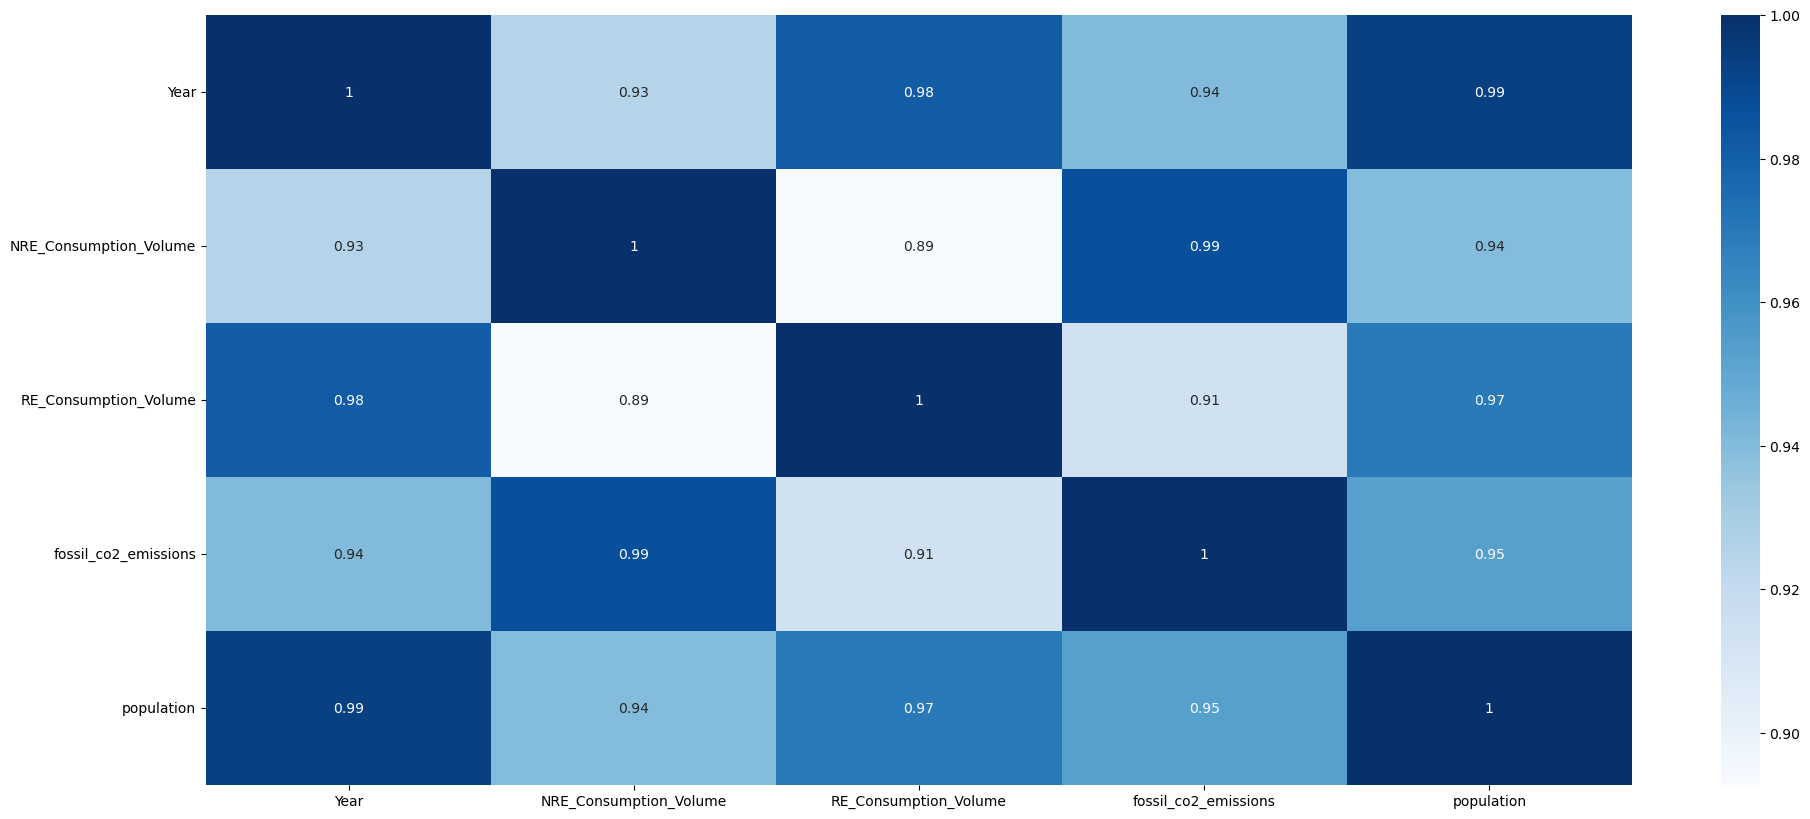

In [11]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(),cmap='Blues',annot = True)
plt.show()

## Correlation between NRE vs CO2

In [16]:
df_correlation_1 = df2[['NRE_Consumption_Volume','fossil_co2_emissions']]
df_correlation_1.head()
df_correlation_1.corr().T

,NRE_Consumption_Volume,fossil_co2_emissions
NRE_Consumption_Volume,1.00000,0.98676
fossil_co2_emissions,0.98676,1.00000


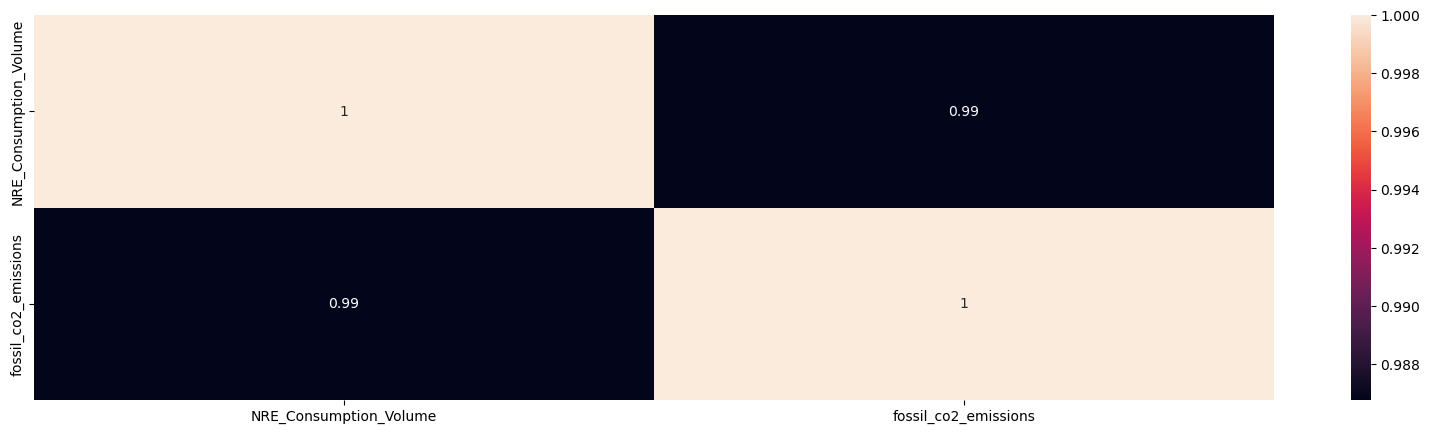

In [18]:
plt.figure(figsize = (20,5))
sns.heatmap(df_correlation_1.corr(), annot = True)
plt.show()

## Correlation between NRE vs CO2

In [21]:
df_correlation_2 = df2[['RE_Consumption_Volume','fossil_co2_emissions']]
df_correlation_2.head()
df_correlation_2.corr().T

,RE_Consumption_Volume,fossil_co2_emissions
RE_Consumption_Volume,1.000000,0.914126
fossil_co2_emissions,0.914126,1.000000


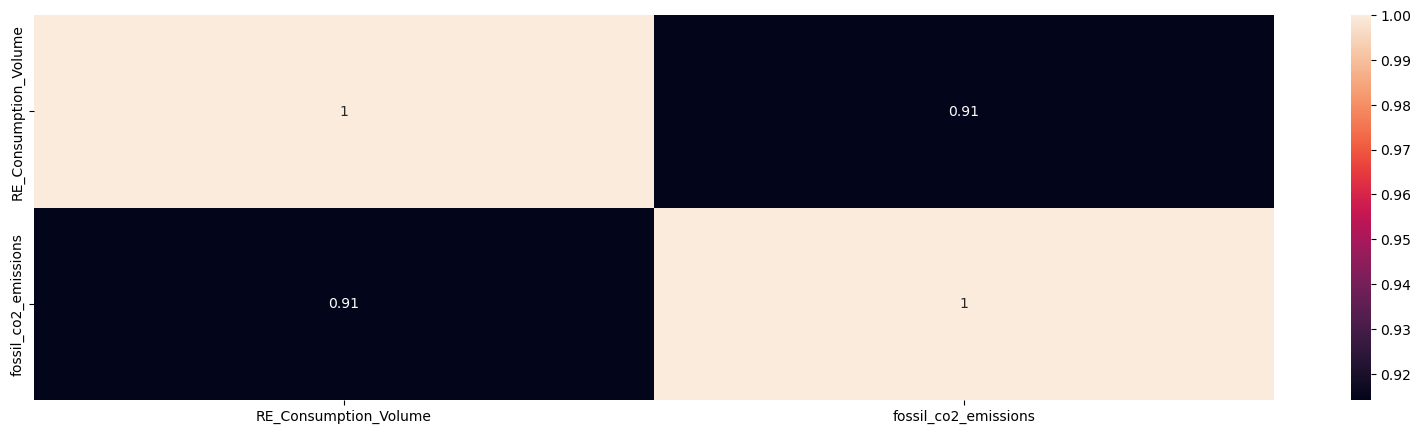

In [23]:
plt.figure(figsize = (20,5))
sns.heatmap(df_correlation_2.corr(), annot = True)
plt.show()

## Outliers

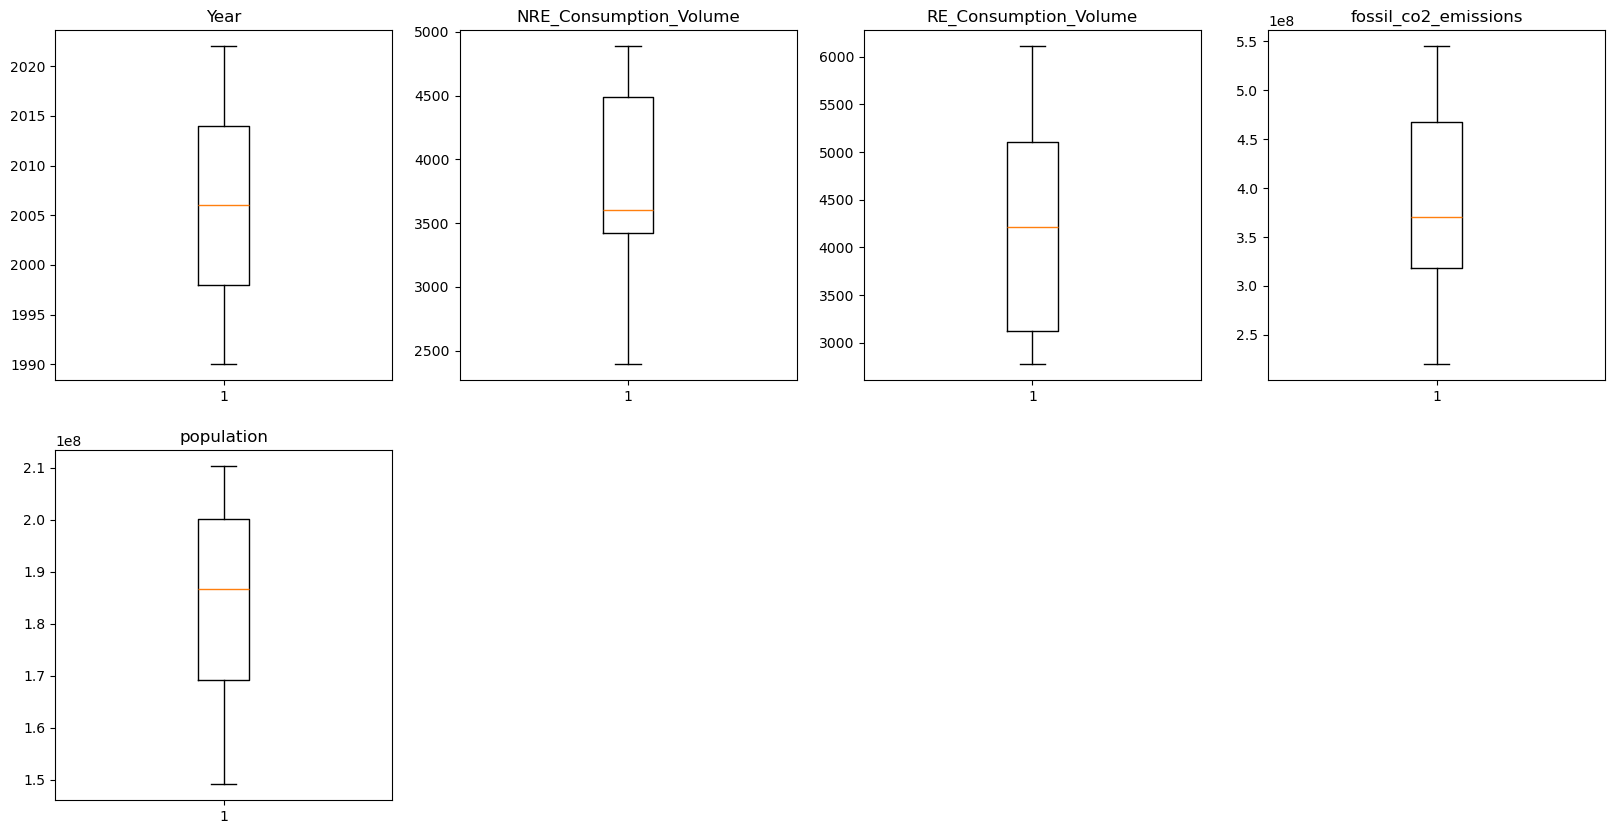

In [25]:
plt.figure(figsize = (20,10))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [27]:
z = np.abs(stats.zscore(df_correlation))
#removing the outliers
df_new = df_correlation[(z < 1.9).all(axis=1)]

In [29]:
df_new.reset_index(drop=True, inplace=True)
df_new.head()

,Year,NRE_Consumption_Volume,RE_Consumption_Volume,fossil_co2_emissions,population
0,1990,2391.625157,2773.494184,219750670,149143223
1,1991,2451.125576,2778.462274,225990470,151724256
2,1992,2498.088535,2775.367449,230088200,154275079
3,1993,2592.448289,2798.150483,240413480,156794577
4,1994,2733.672984,2936.749959,247389640,159265006


In [31]:
print("The length of the original : " , len(df2))
print("The length after removing the outliers : " , len(df_new))
print("We just Removed",len(df2)-len(df_new),"Outliers")

The length of the original :  33
The length after removing the outliers :  33
We just Removed 0 Outliers


## Model Building

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Linear Regression

R²: 0.9798479606603508, MAE: 9536118.01962104


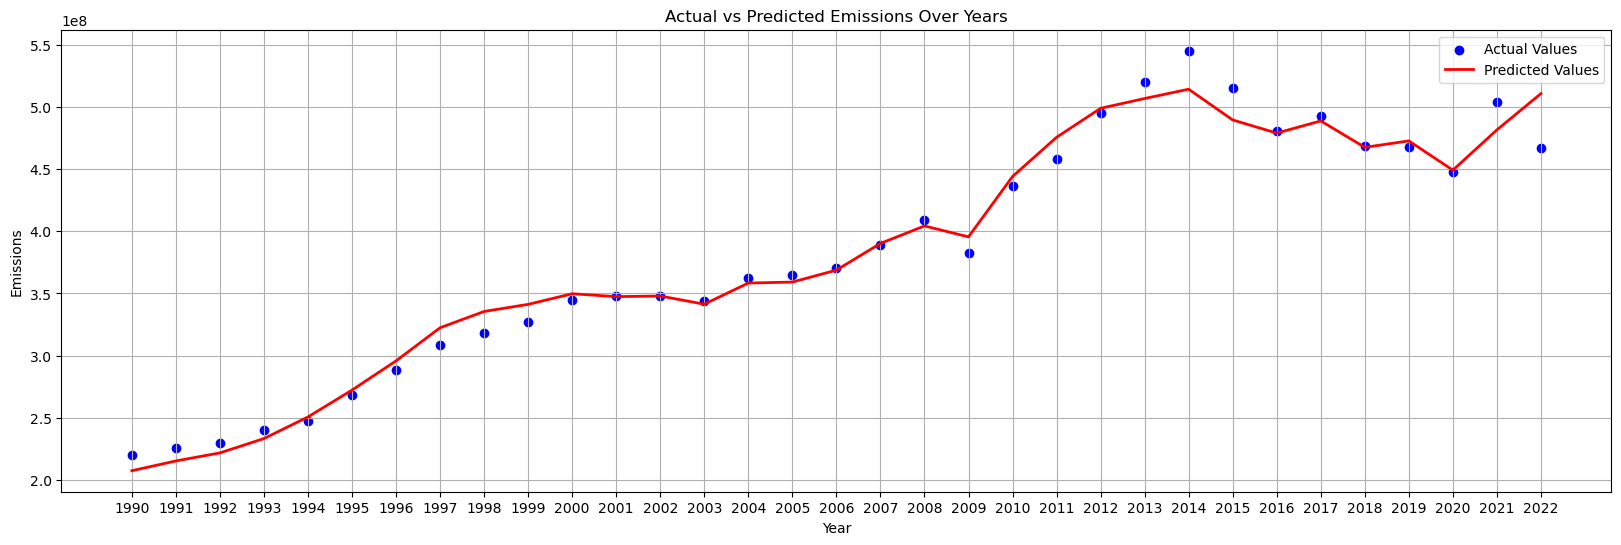

In [35]:
# Prepare the features and target variable
X = df_new[['RE_Consumption_Volume','Year','population','NRE_Consumption_Volume']]
y = df_new['fossil_co2_emissions']

# Fit the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions for the entire dataset
y_pred = model.predict(X)


# # Evaluate performance
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f"R²: {r2}, MAE: {mae}")

# Plotting
plt.figure(figsize=(20, 6))

# Scatter plot of actual values
plt.scatter(df_new['Year'], df_new['fossil_co2_emissions'], color='blue', label='Actual Values', marker='o')

# Line plot of predicted values
# Ensure that the x-axis uses the Year for plotting
plt.plot(df_new['Year'], y_pred, color='red', label='Predicted Values', linewidth=2)

# Adding titles and labels
plt.title('Actual vs Predicted Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(df_new['Year'])  # Set x-ticks to be the years
plt.legend()
plt.grid()

# Show the plot
plt.show()

R²: 0.980: This indicates that approximately 98% of the variance in fossil CO2 emissions is explained by the model. This is still an excellent fit, showing that the model effectively captures the underlying relationships in the data.

MAE: 9,536,118.02: The mean absolute error has increased compared to the previous evaluation, indicating that the average absolute difference between the predicted and actual emissions values is relatively high. This suggests there may be significant outliers or variability in the data.

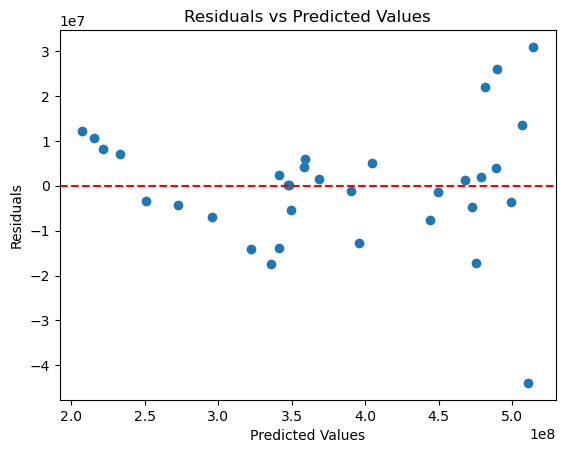

In [37]:
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Random Forest

In [39]:
X = df_new[['RE_Consumption_Volume','Year','population','NRE_Consumption_Volume']]
#X = df_new[['NRE_Consumption_Volume','RE_Consumption_Volume']]
y = df_new['fossil_co2_emissions']

from sklearn.preprocessing import PolynomialFeatures
# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Make predictions
y_pred_rf = rf_model.predict(X)

# Evaluate performance
r2_rf = r2_score(y, y_pred_rf)
mae_rf = mean_absolute_error(y, y_pred_rf)
mse_rf = mean_squared_error(y, y_pred_rf)


print(f"Random Forest R²: {r2_rf}, MAE: {mae_rf}, MSE: {mse_rf}")

Random Forest R²: 0.9968167068294963, MAE: 3974578.3151515117, MSE: 29055177662787.82


R²: 0.997: This value suggests that approximately 99.7% of the variance in fossil CO2 emissions is explained by your model. This is an excellent fit, indicating that the model captures nearly all of the variability in the target variable.

MAE: 3,974,578.32: The mean absolute error is relatively high, indicating that, on average, the predictions deviate significantly from the actual emissions values. This may warrant further investigation into the model’s predictions or the scale of your target variable.

MSE: 29,055,177,662,787.82: The mean squared error is also quite high, reflecting large discrepancies between predicted and actual values. The squared nature of this metric means that larger errors will have a more significant impact on the score.

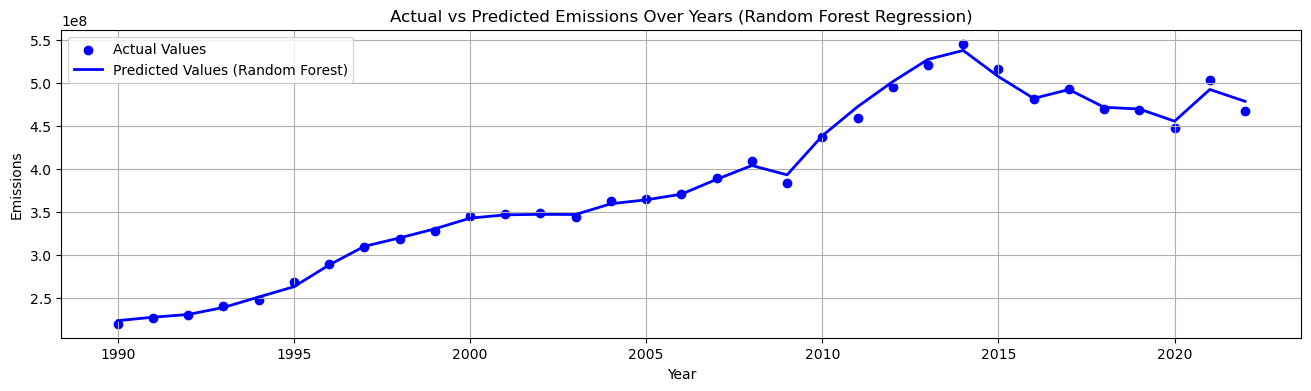

In [51]:
# Plotting
plt.figure(figsize=(16, 4))
plt.scatter(df_new['Year'], y, color='blue', label='Actual Values', marker='o')
plt.plot(df_new['Year'], y_pred_rf, color='blue', label='Predicted Values (Random Forest)', linewidth=2)
plt.title('Actual vs Predicted Emissions Over Years (Random Forest Regression)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid()
plt.show()

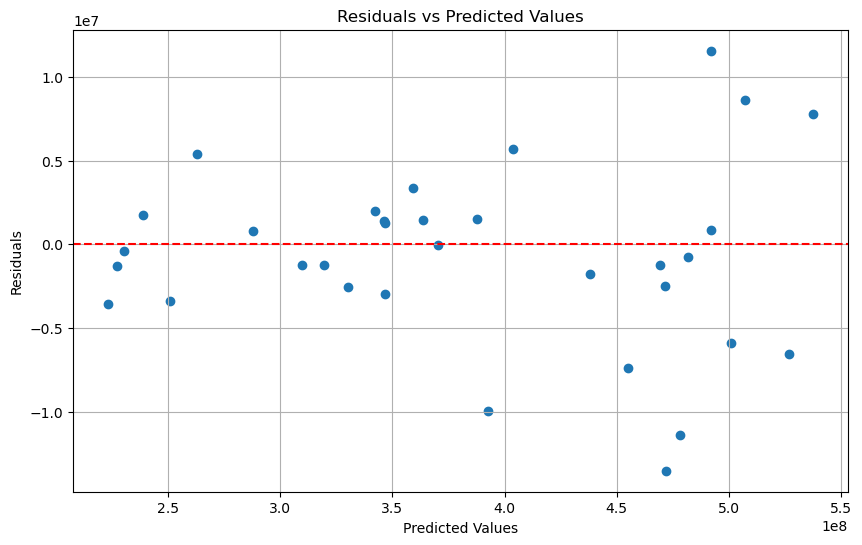

In [45]:
residuals = y - rf_model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(rf_model.predict(X), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

In [53]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                  Feature  Importance
3  NRE_Consumption_Volume    0.306042
0   RE_Consumption_Volume    0.302828
1                    Year    0.231969
2              population    0.159160


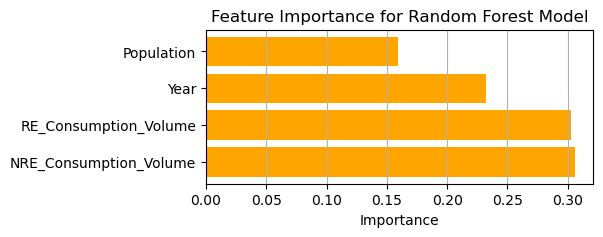

In [55]:
# Sample feature importance data
importance_data = {
    'Feature': ['NRE_Consumption_Volume','RE_Consumption_Volume', 'Year', 'Population'],
    'Importance': [0.306042, 0.302828, 0.231969, 0.159160]
}

importance_df = pd.DataFrame(importance_data)

# Plotting
plt.figure(figsize=(5, 2))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest Model')
plt.grid(axis='x')
plt.show()

NRE_Consumption_Volume (0.306): This feature remains the most important, contributing about 30.6% to the model's predictions. This suggests that changes in non-renewable energy consumption significantly affect fossil CO2 emissions.

RE_Consumption_Volume (0.303): This feature is almost as important as NRE, with a contribution of 30.3%. It implies that renewable energy consumption is also a critical factor influencing emissions, highlighting its role in reducing overall emissions.

Year (0.232): The year contributes 23.2%, indicating a significant trend over time. This could reflect improvements in technology, policy changes, or shifts in energy use over the years.

Population (0.159): While still contributing to the model, population has the lowest importance at 15.9%. This suggests that it has a lesser impact on emissions compared to the energy consumption variables.